<a href="https://colab.research.google.com/github/Ecevangelista/ML-422/blob/main/Assign2_Housing_1_16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
import statistics
import numpy as np
import statsmodels
import statsmodels.api as sm
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import norm,uniform
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import TransformedTargetRegressor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
path = "drive/MyDrive/422NU/housing_train.csv"
df_train = pd.read_csv(path)

In [ ]:
df_train.head()

In [15]:
df_trainc = df_train.copy(deep = True)



```
# This is formatted as code
```

# EDA and Preprocessing

In [16]:
df_trainc['LotFrontage'] = df_trainc['LotFrontage'].fillna(0)
df_trainc['MasVnrArea'] = df_trainc['MasVnrArea'].fillna(0)
df_trainc['GarageYrBlt'] = df_trainc['GarageYrBlt'].fillna(0)

df_trainc.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,...,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,...,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,0.0,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,...,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,

In [17]:
#Convert ordinal variables with dictionary
Rating_dict = {"NA": 0, "Po": 1, "Fa": 2, "TA": 3, "Gd" :4, "Ex" :5}

df_trainc['BsmtQual'] = df_trainc.BsmtQual.map(Rating_dict)
df_trainc['BsmtCond'] = df_trainc.BsmtCond.map(Rating_dict)
df_trainc['FireplaceQu'] = df_trainc.FireplaceQu.map(Rating_dict)
df_trainc['GarageQual'] = df_trainc.GarageQual.map(Rating_dict)
df_trainc['GarageCond'] = df_trainc.GarageCond.map(Rating_dict)
df_trainc['PoolQC'] = df_trainc.PoolQC.map(Rating_dict)
df_trainc['ExterQual'] = df_trainc.ExterQual.map(Rating_dict)
df_trainc['ExterCond'] = df_trainc.ExterCond.map(Rating_dict)
df_trainc['HeatingQC'] = df_trainc.HeatingQC.map(Rating_dict)
df_trainc['KitchenQual'] = df_trainc.KitchenQual.map(Rating_dict)

df_trainc.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4.0,3.0,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,3.0,3.0,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4.0,3.0,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,3.0,Attchd,1976.0,RFn,2,460,3.0,3.0,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4.0,3.0,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,Typ,1,3.0,Attchd,2001.0,RFn,2,608,3.0,3.0,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3.0,4.0,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,Typ,1,4.0,Detchd,1998.0,Unf,3,642,3.0,3.0,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4.0,3.0,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,Typ,1,3.0,Attchd,2000.0,RFn,3,836,3.0,3.0,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,Wood,4.0,3.0,No,GLQ,732,Unf,0,64,796,GasA,...,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,3,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,3.0,3.0,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,4,3,PConc,5.0,3.0,Av,GLQ,1369,Unf,0,317,1686,GasA,...,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,4,7,Typ,1,4.0,Attchd,2004.0,RFn,2,636,3.0,3.0,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,0.0,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,3,3,CBlock,4.0,3.0,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,3,7,Typ,2,3.0,Attchd,1973.0,RFn,2,484,3.0,3.0,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,3,3,BrkTil,3.0,3.0,No,Unf,0,Unf,0,952,952,GasA,...,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,3,8,Min1,2,3.0,Detchd,1931.0,Unf,2,468,2.0,3.0,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,BrkTil,3.0,3.0,No,GLQ,85

In [18]:
#Fix NA in categorical variables
df_trainc['BsmtQual'] = df_trainc['BsmtQual'].fillna(0)
df_trainc['BsmtCond'] = df_trainc['BsmtCond'].fillna(0)
df_trainc['FireplaceQu'] = df_trainc['FireplaceQu'].fillna(0)
df_trainc['GarageQual'] = df_trainc['GarageQual'].fillna(0)
df_trainc['GarageCond'] = df_trainc['GarageCond'].fillna(0)
df_trainc['PoolQC'] = df_trainc['PoolQC'].fillna(0)

df_trainc.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,4.0,3.0,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,4,8,Typ,0,0.0,Attchd,2003.0,RFn,2,548,3.0,3.0,Y,0,61,0,0,0,0,0.0,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,4.0,3.0,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,3,6,Typ,1,3.0,Attchd,1976.0,RFn,2,460,3.0,3.0,Y,298,0,0,0,0,0,0.0,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,4.0,3.0,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,4,6,Typ,1,3.0,Attchd,2001.0,RFn,2,608,3.0,3.0,Y,0,42,0,0,0,0,0.0,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,3.0,4.0,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,4,7,Typ,1,4.0,Detchd,1998.0,Unf,3,642,3.0,3.0,Y,0,35,272,0,0,0,0.0,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,4.0,3.0,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,4,9,Typ,1,3.0,Attchd,2000.0,RFn,3,836,3.0,3.0,Y,192,84,0,0,0,0,0.0,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,3,3,Wood,4.0,3.0,No,GLQ,732,Unf,0,64,796,GasA,...,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,3,5,Typ,0,0.0,Attchd,1993.0,Unf,2,480,3.0,3.0,Y,40,30,0,320,0,0,0.0,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,4,3,PConc,5.0,3.0,Av,GLQ,1369,Unf,0,317,1686,GasA,...,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,4,7,Typ,1,4.0,Attchd,2004.0,RFn,2,636,3.0,3.0,Y,255,57,0,0,0,0,0.0,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,0.0,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,3,3,CBlock,4.0,3.0,Mn,ALQ,859,BLQ,32,216,1107,GasA,...,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,3,7,Typ,2,3.0,Attchd,1973.0,RFn,2,484,3.0,3.0,Y,235,204,228,0,0,0,0.0,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,3,3,BrkTil,3.0,3.0,No,Unf,0,Unf,0,952,952,GasA,...,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,3,8,Min1,2,3.0,Detchd,1931.0,Unf,2,468,2.0,3.0,Y,90,0,205,0,0,0,0.0,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,BrkTil,3.0,3.0,No,GLQ,85

In [19]:
#ONE HOT ENCODING FOR REMAINING CATEGORICAL VARIABLES
df_train_cat = pd.get_dummies(data=df_trainc)
df_train_cat.head(20)

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,...,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,4,3,4.0,3.0,706,0,150,856,5,856,854,0,1710,1,0,2,1,3,1,4,8,0,0.0,2003.0,2,548,3.0,3.0,0,61,0,...,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,3,3,4.0,3.0,978,0,284,1262,5,1262,0,0,1262,0,1,2,0,3,1,3,6,1,3.0,1976.0,2,460,3.0,3.0,298,0,0,...,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,4,3,4.0,3.0,486,0,434,920,5,920,866,0,1786,1,0,2,1,3,1,4,6,1,3.0,2001.0,2,608,3.0,3.0,0,42,0,...,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,3,3,3.0,4.0,216,0,540,756,4,961,756,0,1717,1,0,1,0,3,1,4,7,1,4.0,1998.0,3,642,3.0,3.0,0,35,272,...,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,4,3,4.0,3.0,655,0,490,1145,5,1145,1053,0,2198,1,0,2,1,4,1,4,9,1,3.0,2000.0,3,836,3.0,3.0,192,84,0,...,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
5,6,50,85.0,14115,5,5,1993,1995,0.0,3,3,4.0,3.0,732,0,64,796,5,796,566,0,1362,1,0,1,1,1,1,3,5,0,0.0,1993.0,2,480,3.0,3.0,40,30,0,...,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
6,7,20,75.0,10084,8,5,2004,2005,186.0,4,3,5.0,3.0,1369,0,317,1686,5,1694,0,0,1694,1,0,2,0,3,1,4,7,1,4.0,2004.0,2,636,3.0,3.0,255,57,0,...,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
7,8,60,0.0,10382,7,6,1973,1973,240.0,3,3,4.0,3.0,859,32,216,1107,5,1107,983,0,2090,1,0,2,1,3,1,3,7,2,3.0,1973.0,2,484,3.0,3.0,235,204,228,...,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
8,9,50,51.0,6120,7,5,1931,1950,0.0,3,3,3.0,3.0,0,0,952,952,4,1022,752,0,1774,0,0,2,0,2,2,3,8,2,3.0,1931.0,2,468,2.0,3.0,90,0,205,...,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
9,10,190,50.0,7420,5,6,1939,1950,0.0,3,3,3.0,3.0,851,0,140,991,5,1077,0,0,1077,1,0,1,0,2,2,3,5,2,3.0,1939.0,1,205,4.0,3.0,0,4,0,...,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [20]:
df_train_cat.shape

(1460, 256)

In [ ]:
#Look at correlation with SalePrice
pd.set_option('display.max_rows', None)

corr_train = df_train_cat.corr()['SalePrice']
corr_train[np.argsort(corr_train,axis=0)[::-1]]

In [22]:
#SNS PAIR PLOTS ON SMALL DF with highest correlation

small_trainc = df_train_cat[['SalePrice', 'OverallQual','GrLivArea', 'ExterQual', 'KitchenQual', 'GarageCars', 'GarageArea', 'TotalBsmtSF', 'BsmtQual', 'FullBath', 'TotRmsAbvGrd' ]]


In [ ]:
#SNS PAIR PLOTS ON SMALL DF
sns.pairplot(small_trainc)

In [24]:
#Look at outliers on OverallQual

ovqualoutliers = df_train_cat.loc[(df_train_cat['OverallQual'] == 10) & (df_train_cat['SalePrice'] <=250000)]

print(ovqualoutliers)

        Id  MSSubClass  ...  SaleCondition_Normal  SaleCondition_Partial
523    524          60  ...                     0                      1
1298  1299          60  ...                     0                      1

[2 rows x 256 columns]


In [25]:
#Garage Area outliers
garageaoutl = df_train_cat[df_train_cat['GarageArea']>=1200]
garageaoutl

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,...,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_2Types,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,PavedDrive_N,PavedDrive_P,PavedDrive_Y,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_COD,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
581,582,20,98.0,12704,8,5,2008,2009,306.0,5,3,5.0,3.0,0,0,2042,2042,5,2042,0,0,2042,0,0,2,1,3,1,5,8,1,4.0,2009.0,3,1390,3.0,3.0,0,90,0,...,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
825,826,20,114.0,14803,10,5,2007,2008,816.0,5,3,5.0,3.0,1636,0,442,2078,5,2084,0,0,2084,1,0,2,0,2,1,5,7,1,4.0,2007.0,3,1220,3.0,3.0,188,45,0,...,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1061,1062,30,120.0,18000,3,4,1935,1950,0.0,2,3,3.0,3.0,0,0,894,894,3,894,0,0,894,0,0,1,0,2,1,3,6,0,0.0,1994.0,3,1248,3.0,3.0,0,20,0,...,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
1190,1191,190,0.0,32463,4,4,1961,1975,149.0,3,4,3.0,3.0,1159,0,90,1249,5,1622,0,0,1622,1,0,1,0,3,1,3,7,1,3.0,1975.0,4,1356,3.0,3.0,439,0,0,...,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1298,1299,60,313.0,63887,10,5,2008,2008,796.0,5,3,5.0,3.0,5644,0,466,6110,5,4692,950,0,5642,2,0,2,1,3,1,5,12,3,4.0,2008.0,2,1418,3.0,3.0,214,292,0,...,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [26]:
#GrLivArea Outliers
grlivoutliers = df_train_cat.loc[(df_train_cat['GrLivArea'] >= 4000) & (df_train_cat['SalePrice'] <=250000)]

print(grlivoutliers)

        Id  MSSubClass  ...  SaleCondition_Normal  SaleCondition_Partial
523    524          60  ...                     0                      1
1298  1299          60  ...                     0                      1

[2 rows x 256 columns]


In [27]:
#dropoutliers in train_cat

df_train_cat = df_train_cat.drop(df_train_cat[df_train_cat['Id'] ==1299].index)
df_train_cat = df_train_cat.drop(df_train_cat[df_train_cat['Id'] == 524].index)

df_train_cat.shape

(1458, 256)

In [29]:
#Look at VIF to see which variables are collinear

vif_regr = pd.DataFrame()
vif_regr['feature'] = df_train_cat.columns

vif_regr['VIF'] = [variance_inflation_factor(df_train_cat.values,i) for i in range(len(df_train_cat.columns))]

print(vif_regr)

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)
/usr/local/lib/python3.7/dist-packages/statsmodels/regression/linear_model.py:1636: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


                   feature          VIF
0                       Id     1.199136
1               MSSubClass    33.470460
2              LotFrontage     1.702295
3                  LotArea     3.128190
4              OverallQual     5.666995
5              OverallCond     2.655303
6                YearBuilt    14.918796
7             YearRemodAdd     3.593881
8               MasVnrArea     2.996701
9                ExterQual     4.035892
10               ExterCond     1.555289
11                BsmtQual     7.127051
12                BsmtCond     5.377332
13              BsmtFinSF1          inf
14              BsmtFinSF2          inf
15               BsmtUnfSF          inf
16             TotalBsmtSF          inf
17               HeatingQC     2.386451
18                1stFlrSF          inf
19                2ndFlrSF          inf
20            LowQualFinSF          inf
21               GrLivArea          inf
22            BsmtFullBath     2.924388
23            BsmtHalfBath     1.454615


In [ ]:
vif_regr.sort_values(by = ['VIF'], ascending = False)

In [31]:
#NEW DF removing variables with high VIF
small_trainc1 = df_train_cat[['SalePrice', 'YearBuilt', 'OverallQual',  'OverallCond', 'GarageCars', 'GarageArea', 'GarageYrBlt', 'GarageCond', 'GarageQual' , 'GarageType_BuiltIn', 'GarageType_Detchd','GarageType_Attchd', 'GarageFinish_Fin', 
                              'GarageFinish_Unf','TotRmsAbvGrd', 'BedroomAbvGr',  'GrLivArea', 'FireplaceQu', 'Fireplaces','KitchenAbvGr', 'KitchenQual', 'FullBath', 'HalfBath', 'BsmtFullBath', 'BsmtHalfBath',
                               'ExterQual', 'ExterCond', 'Exterior1st_VinylSd','Exterior2nd_VinylSd',  'MasVnrArea', 'MasVnrType_BrkCmn', 'MasVnrType_None', 'LotFrontage', 'LotArea', 'LotShape_Reg',
                               'Electrical_FuseP', 'Electrical_SBrkr','HeatingQC', 'Alley_Pave', 'Alley_Grvl', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch','3SsnPorch', 'WoodDeckSF',
                              'MiscFeature_Shed', 'MiscFeature_Othr','Fence_GdPrv', 'Fence_MnPrv','Fence_GdWo', 'Fence_MnWw',  'HouseStyle_2Story', 'RoofStyle_Gable', 'RoofStyle_Hip',   
                              'PavedDrive_N', 'PavedDrive_Y', 'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc', 'CentralAir_N', 'CentralAir_Y', 'SaleType_New', 'SaleType_WD', 'SaleCondition_Partial', 
                              'MSZoning_RL', 'MSZoning_RM', 'TotalBsmtSF', 'BsmtFinSF1', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'BsmtQual', 'BsmtCond', 'BsmtFinType1_GLQ', 
                              'BsmtExposure_No', 'BsmtExposure_Gd', 'PoolQC', 'PoolArea', 'YearRemodAdd' ]]

small_trainc1.shape

(1458, 78)

In [32]:
#ADD NEW FEATURE TotalSqftCalc
#small_trainc1['TotalSqftCalc'] = small_trainc1.apply(lambda row:row.TotalBsmtSF + row.GrLivArea, axis =1)
small_trainc1['TotalSqftCalc'] = small_trainc1['TotalBsmtSF'] + small_trainc1['GrLivArea']
small_trainc1.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,SalePrice,YearBuilt,OverallQual,OverallCond,GarageCars,GarageArea,GarageYrBlt,GarageCond,GarageQual,GarageType_BuiltIn,GarageType_Detchd,GarageType_Attchd,GarageFinish_Fin,GarageFinish_Unf,TotRmsAbvGrd,BedroomAbvGr,GrLivArea,FireplaceQu,Fireplaces,KitchenAbvGr,KitchenQual,FullBath,HalfBath,BsmtFullBath,BsmtHalfBath,ExterQual,ExterCond,Exterior1st_VinylSd,Exterior2nd_VinylSd,MasVnrArea,MasVnrType_BrkCmn,MasVnrType_None,LotFrontage,LotArea,LotShape_Reg,Electrical_FuseP,Electrical_SBrkr,HeatingQC,Alley_Pave,Alley_Grvl,OpenPorchSF,EnclosedPorch,ScreenPorch,3SsnPorch,WoodDeckSF,MiscFeature_Shed,MiscFeature_Othr,Fence_GdPrv,Fence_MnPrv,Fence_GdWo,Fence_MnWw,HouseStyle_2Story,RoofStyle_Gable,RoofStyle_Hip,PavedDrive_N,PavedDrive_Y,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,CentralAir_N,CentralAir_Y,SaleType_New,SaleType_WD,SaleCondition_Partial,MSZoning_RL,MSZoning_RM,TotalBsmtSF,BsmtFinSF1,Neighborhood_NoRidge,Neighborhood_NridgHt,BsmtQual,BsmtCond,BsmtFinType1_GLQ,BsmtExposure_No,BsmtExposure_Gd,PoolQC,PoolArea,YearRemodAdd,TotalSqftCalc
0,208500,2003,7,5,2,548,2003.0,3.0,3.0,0,0,1,0,0,8,3,1710,0.0,0,1,4,2,1,1,0,4,3,1,1,196.0,0,0,65.0,8450,1,0,1,5,0,0,61,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,1,0,856,706,0,0,4.0,3.0,1,1,0,0.0,0,2003,2566
1,181500,1976,6,8,2,460,1976.0,3.0,3.0,0,0,1,0,0,6,3,1262,3.0,1,1,3,2,0,0,1,3,3,0,0,0.0,0,1,80.0,9600,1,0,1,5,0,0,0,0,0,0,298,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,0,1262,978,0,0,4.0,3.0,0,0,1,0.0,0,1976,2524
2,223500,2001,7,5,2,608,2001.0,3.0,3.0,0,0,1,0,0,6,3,1786,3.0,1,1,4,2,1,1,0,4,3,1,1,162.0,0,0,68.0,11250,0,0,1,5,0,0,42,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,1,0,920,486,0,0,4.0,3.0,1,0,0,0.0,0,2002,2706
3,140000,1915,7,5,3,642,1998.0,3.0,3.0,0,1,0,0,1,7,3,1717,4.0,1,1,4,1,0,1,0,3,3,0,0,0.0,0,1,60.0,9550,0,0,1,4,0,0,35,272,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,0,1,0,1,0,756,216,0,0,3.0,4.0,0,1,0,0.0,0,1970,2473
4,250000,2000,8,5,3,836,2000.0,3.0,3.0,0,0,1,0,0,9,4,2198,3.0,1,1,4,2,1,1,0,4,3,1,1,350.0,0,0,84.0,14260,0,0,1,5,0,0,84,0,0,0,192,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,0,1,0,1,0,1145,655,1,0,4.0,3.0,1,0,0,0.0,0,2000,3343


In [33]:
#VIF CHECK ON small_trainc1

vif_smalldf = pd.DataFrame()
vif_smalldf['feature'] = small_trainc1.columns

vif_smalldf['VIF'] = [variance_inflation_factor(small_trainc1.values,i) for i in range(len(small_trainc1.columns))]

/usr/local/lib/python3.7/dist-packages/statsmodels/stats/outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [ ]:
vif_smalldf.sort_values(by = ['VIF'], ascending = False)

In [34]:
#Removing features after VIF Check on SMALL_TRAINC1 and drop MiscFeatureTenC and Electrical mix since they are not in Test, remove GrLivArea and TotalBsmtSF due to adding totalSqFt

small_trainc2 = small_trainc1.drop(columns = ['Exterior1st_VinylSd', 'Exterior2nd_VinylSd', 'GarageYrBlt', 'CentralAir_Y', 'CentralAir_N', 'GrLivArea', 'TotalBsmtSF'])

small_trainc2.shape

(1458, 72)

In [35]:
#Initial Regression to review coefficients
small_trainc2_x = small_trainc2.drop(columns = ['SalePrice'])

small_trainc2_x.shape

(1458, 71)

In [36]:
small_trainc2_y = small_trainc2['SalePrice']
small_trainc2_y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [37]:
#SPLIT INTO TEST AND TRAIN
X_train, X_test, y_train, y_test = train_test_split(small_trainc2_x, small_trainc2_y, test_size=0.2, random_state=10)

In [38]:
X2 = sm.add_constant(X_train)
model = sm.OLS(y_train,X2)
resultsc2 = model.fit()
print(resultsc2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     148.7
Date:                Mon, 17 Jan 2022   Prob (F-statistic):               0.00
Time:                        06:10:57   Log-Likelihood:                -13466.
No. Observations:                1166   AIC:                         2.707e+04
Df Residuals:                    1095   BIC:                         2.743e+04
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -2.447e+

In [39]:
#refine model to remove non-significant variables
small_traind = small_trainc2[['SalePrice', 'OverallQual', 'OverallCond', 'GarageArea', 'GarageCond', 'GarageType_BuiltIn', 'GarageFinish_Fin', 'GarageFinish_Unf', 'TotRmsAbvGrd', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'Fireplaces','HalfBath', 'BsmtFullBath', 'ExterQual',
                              'MasVnrArea', 'MasVnrType_None', 'LotFrontage', 'LotArea', 'LotShape_Reg', 'ScreenPorch', 'MiscFeature_Othr', 'Fence_GdPrv', 'HouseStyle_2Story', 'RoofStyle_Hip', 'Foundation_CBlock', 'SaleType_New',
                              'Neighborhood_NoRidge', 'Neighborhood_NridgHt','BsmtCond', 'BsmtExposure_Gd', 'PoolQC','TotalSqftCalc']]
small_traind.shape


(1458, 34)

# Model 2 no scaling

In [40]:
small_trainc3 = small_traind.copy(deep = True)

In [41]:
#split small_trainc3 into test and train
small_trainc3_x = small_trainc3.drop(columns = ['SalePrice'])
small_trainc3_x.shape


(1458, 33)

In [42]:
small_trainc3_y = small_trainc3['SalePrice']
small_trainc3_y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [43]:
#regression test_train split
X_trainc3, X_testc3, y_trainc3, y_testc3 = train_test_split(small_trainc3_x, small_trainc3_y, test_size=0.2, random_state=10)

In [44]:
#Model 2 statsmodels summary
XK = sm.add_constant(X_trainc3)
modelK = sm.OLS(y_trainc3,XK)
resultsK = modelK.fit()
print(resultsK.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     290.7
Date:                Mon, 17 Jan 2022   Prob (F-statistic):               0.00
Time:                        06:17:09   Log-Likelihood:                -13543.
No. Observations:                1166   AIC:                         2.715e+04
Df Residuals:                    1133   BIC:                         2.732e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -8.032e+04 

In [45]:
#Model 2 linear model with SKLEARN to get RMSE

regrc3 = linear_model.LinearRegression()
regrc3.fit(X_trainc3, y_trainc3)

#predicted values
regrc3_pred = regrc3.predict(X_testc3) 

In [49]:
#Model 2 RMSE

regrc3_RMSE = mean_squared_error(y_testc3, regrc3_pred, squared = False)
print("Model 2 RMSE", regrc3_RMSE)

Model 2 RMSE 27093.018960031684


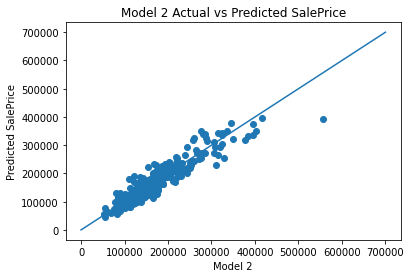

In [50]:
#Model 2 no scaling plots
#Actual vs Fitted

plt.scatter(y_testc3, regrc3_pred)
plt.plot(range(700000), range(700000))

plt.xlabel("Model 2")
plt.ylabel("Predicted SalePrice")
plt.title("Model 2 Actual vs Predicted SalePrice")

plt.show()

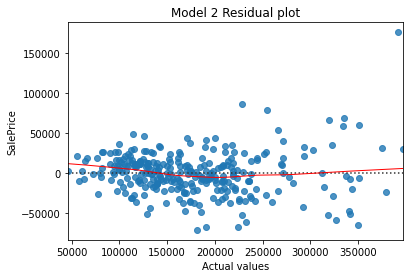

In [51]:
#Model 2 residualsplot no scaling
sns.residplot(x=regrc3_pred, y=y_testc3, lowess = True, 
              line_kws={'color':'red', 'lw' :1, 'alpha' :1})

plt.xlabel("Fitted values")
plt.xlabel("Actual values")
plt.title("Model 2 Residual plot")
plt.show()

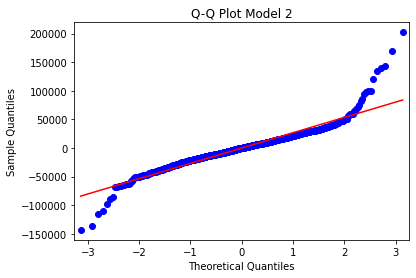

In [52]:
# Model 2 qqplot no scaling
sm.qqplot(resultsK.resid, line='s')
plt.title("Q-Q Plot Model 2")
plt.show()

# Model 3 MinMax scaling

In [53]:
traine = small_traind.copy(deep = True)

In [54]:
traine.shape

(1458, 34)

In [56]:
#apply scaler to continuous variables on traine


traine1_cont = traine.loc[:,['SalePrice', 'GarageArea', 'TotRmsAbvGrd', 'BedroomAbvGr', 'Fireplaces', 'MasVnrArea', 'LotFrontage', 'LotArea', 'TotalSqftCalc']]
traine1_cont_columns = traine1_cont.columns

#traine_cont.head()

scalere1 = MinMaxScaler()
traine1_cont = scalere1.fit_transform(traine1_cont)

traine1_cont = pd.DataFrame(traine1_cont)
traine1_cont.columns = traine1_cont_columns
traine1_cont.head()

,SalePrice,GarageArea,TotRmsAbvGrd,BedroomAbvGr,Fireplaces,MasVnrArea,LotFrontage,LotArea,TotalSqftCalc
0,0.241078,0.394245,0.500000,0.375,0.000000,0.12250,0.207668,0.033420,0.341389
1,0.203583,0.330935,0.333333,0.375,0.333333,0.00000,0.255591,0.038795,0.334965
2,0.261908,0.437410,0.333333,0.375,0.333333,0.10125,0.217252,0.046507,0.362802
3,0.145952,0.461871,0.416667,0.375,0.333333,0.00000,0.191693,0.038561,0.327164
4,0.298709,0.601439,0.583333,0.500,0.333333,0.21875,0.268371,0.060576,0.460232


In [57]:
#insert new columns to traine to add scaled columns

traine.insert(0,"SalePrice_sc", traine1_cont['SalePrice'])
traine.insert(4, "GarageArea_sc", traine1_cont['GarageArea'])
traine.insert(10, "TotRmsAbvGrd_sc", traine1_cont['TotRmsAbvGrd'])
traine.insert(12, "BedroomAbvGr_sc", traine1_cont['BedroomAbvGr'])
traine.insert(16, "Fireplaces_sc", traine1_cont['Fireplaces'])
traine.insert(21, "MasVnrArea_sc", traine1_cont['MasVnrArea'])
traine.insert(24, "LotFrontage_sc", traine1_cont['LotFrontage'])
traine.insert(26, "LotArea_sc", traine1_cont['LotArea'])
traine.insert(41, "TotalSqftCalc_sc", traine1_cont['TotalSqftCalc'])

traine.head()

,SalePrice_sc,SalePrice,OverallQual,OverallCond,GarageArea_sc,GarageArea,GarageCond,GarageType_BuiltIn,GarageFinish_Fin,GarageFinish_Unf,TotRmsAbvGrd_sc,TotRmsAbvGrd,BedroomAbvGr_sc,BedroomAbvGr,KitchenAbvGr,KitchenQual,Fireplaces_sc,Fireplaces,HalfBath,BsmtFullBath,ExterQual,MasVnrArea_sc,MasVnrArea,MasVnrType_None,LotFrontage_sc,LotFrontage,LotArea_sc,LotArea,LotShape_Reg,ScreenPorch,MiscFeature_Othr,Fence_GdPrv,HouseStyle_2Story,RoofStyle_Hip,Foundation_CBlock,SaleType_New,Neighborhood_NoRidge,Neighborhood_NridgHt,BsmtCond,BsmtExposure_Gd,PoolQC,TotalSqftCalc_sc,TotalSqftCalc
0,0.241078,208500,7,5,0.394245,548,3.0,0,0,0,0.500000,8,0.375,3,1,4,0.000000,0,1,1,4,0.12250,196.0,0,0.207668,65.0,0.033420,8450,1,0,0,0,1,0,0,0,0,0,3.0,0,0.0,0.341389,2566
1,0.203583,181500,6,8,0.330935,460,3.0,0,0,0,0.333333,6,0.375,3,1,3,0.333333,1,0,0,3,0.00000,0.0,1,0.255591,80.0,0.038795,9600,1,0,0,0,0,0,1,0,0,0,3.0,1,0.0,0.334965,2524
2,0.261908,223500,7,5,0.437410,608,3.0,0,0,0,0.333333,6,0.375,3,1,4,0.333333,1,1,1,4,0.10125,162.0,0,0.217252,68.0,0.046507,11250,0,0,0,0,1,0,0,0,0,0,3.0,0,0.0,0.362802,2706
3,0.145952,140000,7,5,0.461871,642,3.0,0,0,1,0.416667,7,0.375,3,1,4,0.333333,1,0,1,3,0.00000,0.0,1,0.191693,60.0,0.038561,9550,0,0,0,0,1,0,0,0,0,0,4.0,0,0.0,0.327164,2473
4,0.298709,250000,8,5,0.601439,836,3.0,0,0,0,0.583333,9,0.500,4,1,4,0.333333,1,1,1,4,0.21875,350.0,0,0.268371,84.0,0.060576,14260,0,0,0,0,1,0,0,0,1,0,3.0,0,0.0,0.460232,3343


In [58]:
traine.isna().sum()

SalePrice_sc            2
SalePrice               0
OverallQual             0
OverallCond             0
GarageArea_sc           2
GarageArea              0
GarageCond              0
GarageType_BuiltIn      0
GarageFinish_Fin        0
GarageFinish_Unf        0
TotRmsAbvGrd_sc         2
TotRmsAbvGrd            0
BedroomAbvGr_sc         2
BedroomAbvGr            0
KitchenAbvGr            0
KitchenQual             0
Fireplaces_sc           2
Fireplaces              0
HalfBath                0
BsmtFullBath            0
ExterQual               0
MasVnrArea_sc           2
MasVnrArea              0
MasVnrType_None         0
LotFrontage_sc          2
LotFrontage             0
LotArea_sc              2
LotArea                 0
LotShape_Reg            0
ScreenPorch             0
MiscFeature_Othr        0
Fence_GdPrv             0
HouseStyle_2Story       0
RoofStyle_Hip           0
Foundation_CBlock       0
SaleType_New            0
Neighborhood_NoRidge    0
Neighborhood_NridgHt    0
BsmtCond    

In [ ]:
traine.isna()

In [62]:
#drop nonscaled columns

traine = traine.drop(columns = ['SalePrice', 'GarageArea', 'TotRmsAbvGrd', 'BedroomAbvGr', 'Fireplaces', 'MasVnrArea', 'LotFrontage', 'LotArea', 'TotalSqftCalc'])
traine.head()

,SalePrice_sc,OverallQual,OverallCond,GarageArea_sc,GarageCond,GarageType_BuiltIn,GarageFinish_Fin,GarageFinish_Unf,TotRmsAbvGrd_sc,BedroomAbvGr_sc,KitchenAbvGr,KitchenQual,Fireplaces_sc,HalfBath,BsmtFullBath,ExterQual,MasVnrArea_sc,MasVnrType_None,LotFrontage_sc,LotArea_sc,LotShape_Reg,ScreenPorch,MiscFeature_Othr,Fence_GdPrv,HouseStyle_2Story,RoofStyle_Hip,Foundation_CBlock,SaleType_New,Neighborhood_NoRidge,Neighborhood_NridgHt,BsmtCond,BsmtExposure_Gd,PoolQC,TotalSqftCalc_sc
0,0.241078,7,5,0.394245,3.0,0,0,0,0.500000,0.375,1,4,0.000000,1,1,4,0.12250,0,0.207668,0.033420,1,0,0,0,1,0,0,0,0,0,3.0,0,0.0,0.341389
1,0.203583,6,8,0.330935,3.0,0,0,0,0.333333,0.375,1,3,0.333333,0,0,3,0.00000,1,0.255591,0.038795,1,0,0,0,0,0,1,0,0,0,3.0,1,0.0,0.334965
2,0.261908,7,5,0.437410,3.0,0,0,0,0.333333,0.375,1,4,0.333333,1,1,4,0.10125,0,0.217252,0.046507,0,0,0,0,1,0,0,0,0,0,3.0,0,0.0,0.362802
3,0.145952,7,5,0.461871,3.0,0,0,1,0.416667,0.375,1,4,0.333333,0,1,3,0.00000,1,0.191693,0.038561,0,0,0,0,1,0,0,0,0,0,4.0,0,0.0,0.327164
4,0.298709,8,5,0.601439,3.0,0,0,0,0.583333,0.500,1,4,0.333333,1,1,4,0.21875,0,0.268371,0.060576,0,0,0,0,1,0,0,0,1,0,3.0,0,0.0,0.460232


In [63]:
traine.shape

(1458, 34)

In [69]:
traine.isna().sum()

SalePrice_sc            2
OverallQual             0
OverallCond             0
GarageArea_sc           2
GarageCond              0
GarageType_BuiltIn      0
GarageFinish_Fin        0
GarageFinish_Unf        0
TotRmsAbvGrd_sc         2
BedroomAbvGr_sc         2
KitchenAbvGr            0
KitchenQual             0
Fireplaces_sc           2
HalfBath                0
BsmtFullBath            0
ExterQual               0
MasVnrArea_sc           2
MasVnrType_None         0
LotFrontage_sc          2
LotArea_sc              2
LotShape_Reg            0
ScreenPorch             0
MiscFeature_Othr        0
Fence_GdPrv             0
HouseStyle_2Story       0
RoofStyle_Hip           0
Foundation_CBlock       0
SaleType_New            0
Neighborhood_NoRidge    0
Neighborhood_NridgHt    0
BsmtCond                0
BsmtExposure_Gd         0
PoolQC                  0
TotalSqftCalc_sc        2
dtype: int64

In [72]:
traine.loc[1458:1459].fillna(traine.mean(),inplace = True)
traine.loc[1458:1459]

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


,SalePrice_sc,OverallQual,OverallCond,GarageArea_sc,GarageCond,GarageType_BuiltIn,GarageFinish_Fin,GarageFinish_Unf,TotRmsAbvGrd_sc,BedroomAbvGr_sc,KitchenAbvGr,KitchenQual,Fireplaces_sc,HalfBath,BsmtFullBath,ExterQual,MasVnrArea_sc,MasVnrType_None,LotFrontage_sc,LotArea_sc,LotShape_Reg,ScreenPorch,MiscFeature_Othr,Fence_GdPrv,HouseStyle_2Story,RoofStyle_Hip,Foundation_CBlock,SaleType_New,Neighborhood_NoRidge,Neighborhood_NridgHt,BsmtCond,BsmtExposure_Gd,PoolQC,TotalSqftCalc_sc
1458,0.202625,5,6,0.339417,3.0,0,0,1,0.375687,0.358259,1,4,0.203526,0,1,3,0.063554,1,0.183425,0.042809,1,0,0,0,0,1,1,0,0,0,3.0,0,0.0,0.340761
1459,0.202625,5,6,0.339417,3.0,0,1,0,0.375687,0.358259,1,3,0.203526,1,1,4,0.063554,1,0.183425,0.042809,1,0,0,0,0,0,1,0,0,0,3.0,0,0.0,0.340761


In [73]:
#Linear Regression on scaled Traine

traine_x =traine.drop(columns = ['SalePrice_sc'])

traine_x.shape

(1458, 33)

In [74]:
traine_y = traine['SalePrice_sc']
traine_y.head()

0    0.241078
1    0.203583
2    0.261908
3    0.145952
4    0.298709
Name: SalePrice_sc, dtype: float64

In [75]:
X_traine, X_teste, y_traine, y_teste = train_test_split(traine_x, traine_y, test_size=0.2, random_state=10)

In [76]:
#Model 3 get summary with statsmodels - traine

X2e1 = sm.add_constant(X_traine)
model_e1 = sm.OLS(y_traine, X2e1)
results_e1 = model_e1.fit()
print(results_e1.summary())

                            OLS Regression Results                            
Dep. Variable:           SalePrice_sc   R-squared:                       0.784
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     128.7
Date:                Mon, 17 Jan 2022   Prob (F-statistic):               0.00
Time:                        06:44:37   Log-Likelihood:                 1792.6
No. Observations:                1166   AIC:                            -3519.
Df Residuals:                    1133   BIC:                            -3352.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -0.0192 

In [77]:
#sklearn to get RMSE
regre = linear_model.LinearRegression()
regre.fit(X_traine, y_traine)

#predicted values
regre_pred = regre.predict(X_teste) 

In [78]:
#Model 3 RMSE on traine

regre_RMSE = mean_squared_error(y_teste,regre_pred, squared = False)
print("Model3_RMSE", regre_RMSE)

Model3_RMSE 0.04828351281546297


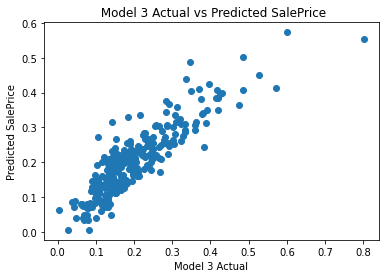

In [80]:
#Model 3 Actual vs Fitted

plt.scatter(y_teste, regre_pred)
plt.plot()

plt.xlabel("Model 3 Actual")
plt.ylabel("Predicted SalePrice")
plt.title(" Model 3 Actual vs Predicted SalePrice")

plt.show()

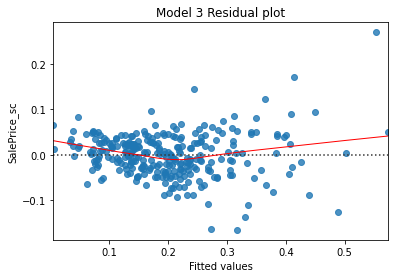

In [81]:
#residualsplot traine
sns.residplot(x=regre_pred, y=y_teste, lowess = True, 
              line_kws={'color':'red', 'lw' :1, 'alpha' :1})

plt.xlabel("Fitted values")
plt.title("Model 3 Residual plot")
plt.show()

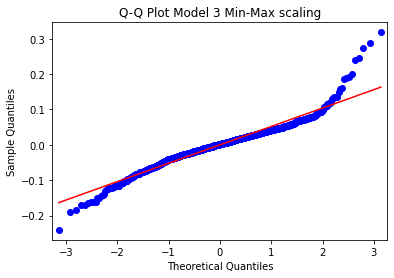

In [82]:
#Model 3 QQ Plot
sm.qqplot(results_e1.resid, line='s')
plt.title("Q-Q Plot Model 3 Min-Max scaling")
plt.show()

# K Folds Cross Validation

In [79]:
folds = KFold(n_splits = 5, shuffle = True, random_state = 10)
scores = cross_val_score(regre, X_traine, y_traine, scoring = 'neg_root_mean_squared_error', cv=folds)
scores

array([-0.05557207, -0.06345314, -0.05108367, -0.05421801, -0.04490469])



# Models 4 & 5 with Polynomial Features

In [83]:
#SKLEARN POLYNOMIAL FEATURES

degrees = [1,2,3]

y_train_pred = np.zeros((len(X_traine), len(degrees)))
y_test_pred = np.zeros((len(X_teste), len(degrees)))

for i, degree in enumerate(degrees):
  model = make_pipeline(PolynomialFeatures(degree), linear_model.LinearRegression())
  model.fit(X_traine, y_traine)

  y_train_pred[:,i] = model.predict(X_traine)
  y_test_pred[:,i] = model.predict(X_teste)


In [84]:
print("X_traine",len(X_traine))
print("X_teste", len(X_teste))

X_traine 1166
X_teste 292


In [85]:
#COMPARE POLYNOMIAL RMSE

print("RMSE:")

for i, degree in enumerate(degrees):
  train_rmse = round(mean_squared_error(y_traine,y_train_pred[:,i],squared = False),4)
  test_rmse = round(mean_squared_error(y_teste,y_test_pred[:,i],squared = False),4)
  print("Polynomial degree {0}: train score={1}, test score = {2}".format(degree, train_rmse, test_rmse))

RMSE:
Polynomial degree 1: train score=0.052, test score = 0.0483
Polynomial degree 2: train score=0.0326, test score = 0.0813
Polynomial degree 3: train score=0.0, test score = 0.5135
